# Principal Component Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

Generate some random correlated two dimensional data.

In [2]:
# Generate a random cloud of (x, y) points.
np.random.seed(1)
X = np.random.randn(200, 2)

# Apply a random transformation (rotation, scaling) to the points.
transformation = np.random.rand(2, 2)  # 2x2 random transformation matrix
X = X @ transformation  # apply the transformation to the points

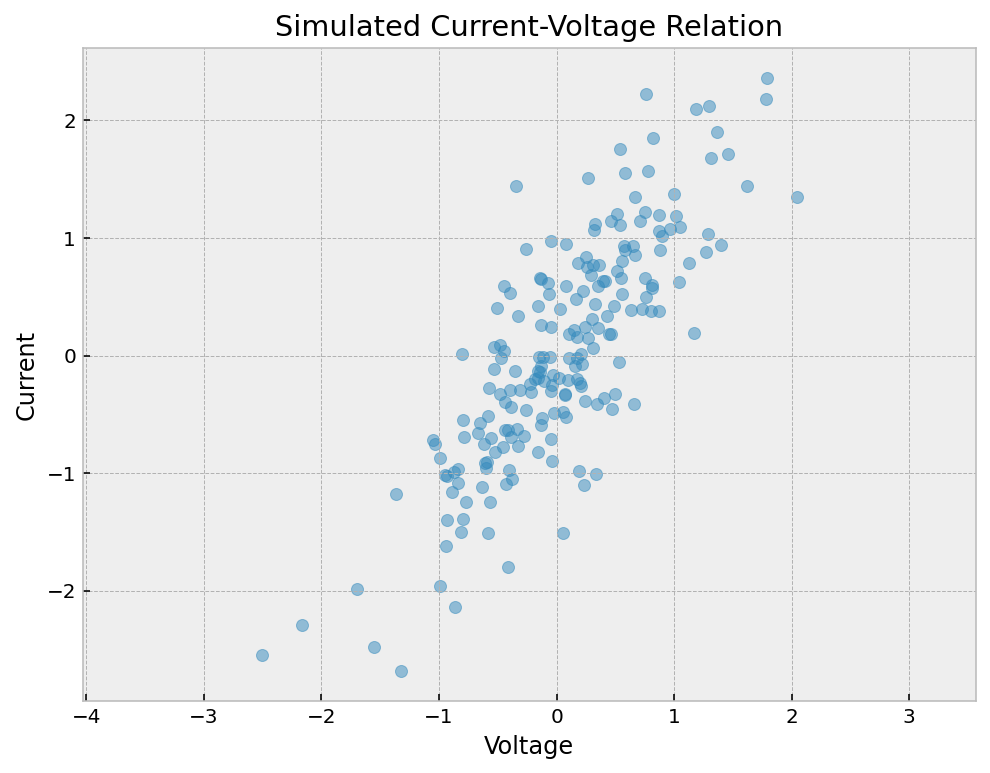

In [3]:
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('Simulated Current-Voltage Relation')
plt.axis('equal');

### PCA analysis of the two dimensional data above.

### Learning Objectives

1. You will visualize the process of changing our perspective to align with the variance in the data.
2. You will visualize the effects of projecting the data onto a smaller number of principal components.
3. You will be able to interpret the principal components as axes in the original data space.

In [4]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(X)  # each column of xy is a feature (or a dimension)

PCA(n_components=2)

The principal components are the directions in the data space (2-dimensional in this example) that best explain the variance in the data.

In [5]:
pca2.components_

array([[-0.56295862, -0.82648508],
       [-0.82648508,  0.56295862]])

In [11]:
# 1st and 2nd principle component axes
pc0 = pca2.components_[0,:]
pc1 = pca2.components_[1,:]
pc0, pc1

(array([-0.56295862, -0.82648508]), array([-0.82648508,  0.56295862]))

In [12]:
# this function will draw an arrow from point v0 to point v1
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, color='black', shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

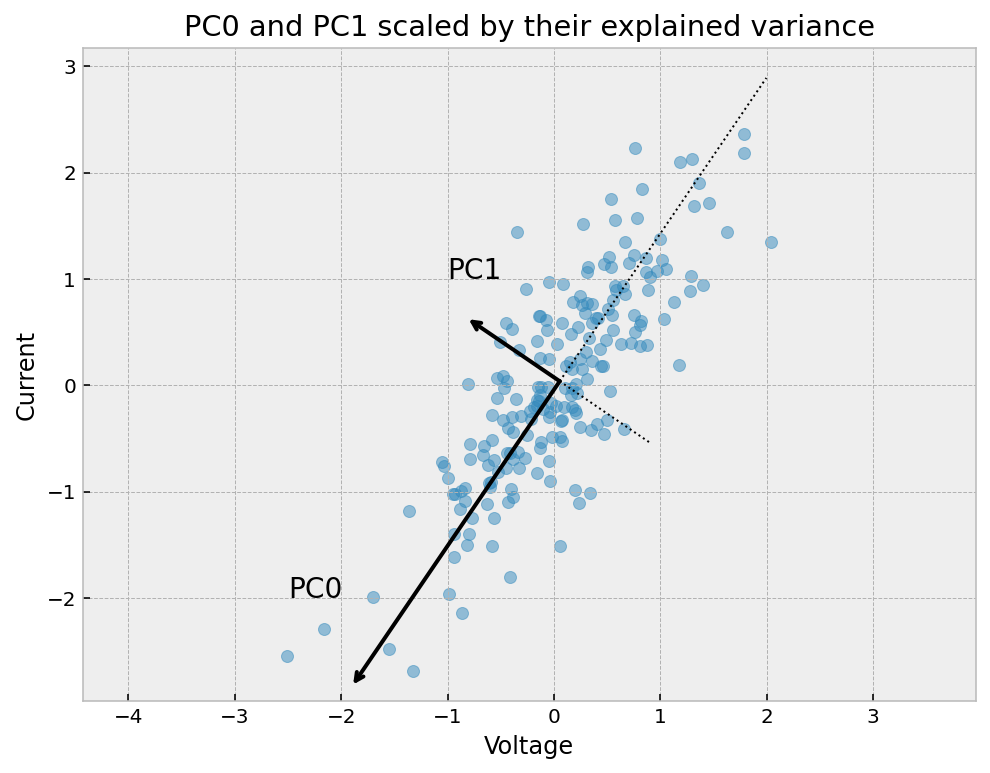

In [13]:
# replot the data points overlaid with arrows showing the principal components
plt.scatter(X[:,0], X[:,1], alpha=0.5)
for length, pcaxis in zip(pca2.explained_variance_, pca2.components_):
    v = pcaxis * 3 * np.sqrt(length)
    draw_vector(pca2.mean_, pca2.mean_ + v)
    plt.plot(pca2.mean_[0] - [0, v[0]], pca2.mean_[1] - [0, v[1]], 'k:', lw=1);
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('PC0 and PC1 scaled by their explained variance')
plt.axis('equal')
plt.text(-2.5, -2, 'PC0', fontsize=14)
plt.text(-1, 1, 'PC1', fontsize=14);

Each principal component accounts for some amount of the variance in the data.

In [14]:
# how much variance each of the above vectors accounts for
pca2.explained_variance_

array([1.32170439, 0.11909325])

The relative amounts of variance accounted for by each principal component in descending order.

In [15]:
# normalized variance explained across all principal components (sum = 1)
pca2.explained_variance_ratio_

array([0.91734214, 0.08265786])

The principal components are relative to the mean of the data.

In [16]:
pca2.mean_

array([0.05398738, 0.03917781])

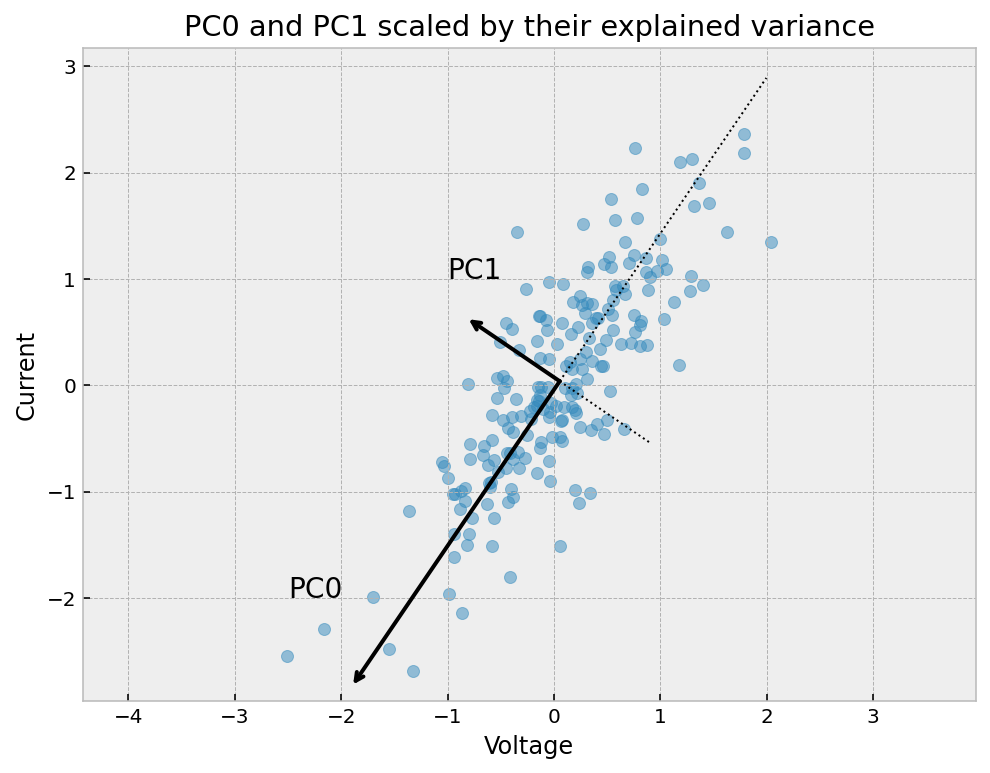

In [11]:
# replot the data points overlaid with arrows showing the principal components
plt.scatter(X[:,0], X[:,1], alpha=0.5)
for length, pcaxis in zip(pca2.explained_variance_, pca2.components_):
    v = pcaxis * 3 * np.sqrt(length)
    draw_vector(pca2.mean_, pca2.mean_ + v)
    plt.plot(pca2.mean_[0] - [0, v[0]], pca2.mean_[1] - [0, v[1]], 'k:', lw=1);
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('PC0 and PC1 scaled by their explained variance')
plt.axis('equal')
plt.text(-2.5, -2, 'PC0', fontsize=14)
plt.text(-1, 1, 'PC1', fontsize=14);

If you had to describe each of the above data points with only one value, how would you do it?

Rotate the data so that you look at it from the perspective of the principal component axes PC0 and PC1.

!!! This does NOT change the data, just the perspective from which we view it!

In [17]:
X_pca2 = pca2.transform(X)

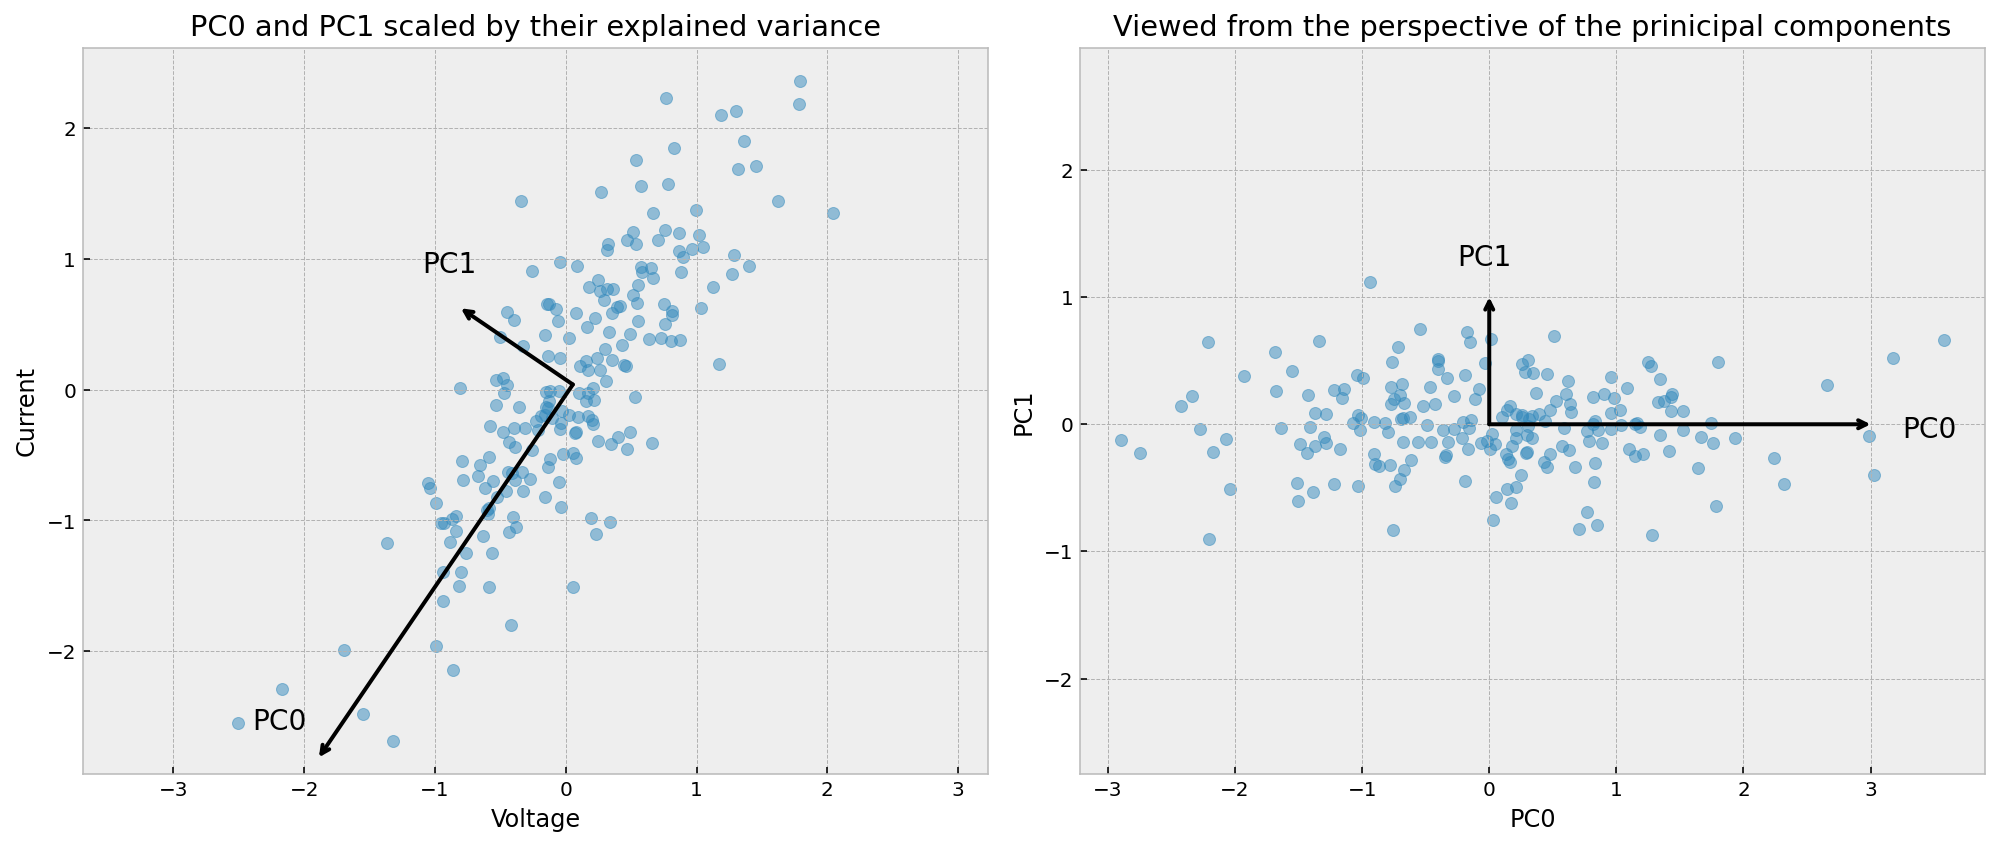

In [13]:
# transform to principal component axes
plt.figure(figsize=[14,6])
plt.subplot(121)
plt.scatter(X[:,0], X[:,1], alpha=0.5)
for length, pcaxis in zip(pca2.explained_variance_, pca2.components_):
    v = pcaxis * 3 * np.sqrt(length)
    draw_vector(pca2.mean_, pca2.mean_ + v)
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('PC0 and PC1 scaled by their explained variance')
plt.axis('equal')
plt.text(-2.4, -2.6, 'PC0', fontsize=14)
plt.text(-1.1, 0.9, 'PC1', fontsize=14)

plt.subplot(122)
plt.scatter(X_pca2[:,0], X_pca2[:,1], alpha=0.5)
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Viewed from the perspective of the prinicipal components')
plt.axis('equal')
plt.text(3.25, -0.1, 'PC0', fontsize=14)
plt.text(-0.25, 1.25, 'PC1', fontsize=14)
plt.tight_layout();

Each principal component is a weighted mixture of the features/dimensions in the original dataset.

    PC0 = -0.56 Voltage - 0.83 Current
    PC1 = -0.83 Voltage - 0.56 Current

### Dimensionality reduction

* Most of the variance in the data is along PC0.
* You can opt to ignore the variance along PC1.
* This amounts to projecting the data onto PC0.
* You lose some information, but it is the smallest component of variation in the data.
* In return, you have compressed the data from two to one dimensional.

In [23]:
# redo PCA, but specify only a single component
pca1 = PCA(n_components=1)
pca1.fit(X)

PCA(n_components=1)

In [24]:
# transform to PCA coordinates
X_pca1 = pca1.transform(X)

# see that we have compressed the data from two to one dimensional
print("     X:", X.shape)
print("X_pca1:", X_pca1.shape)

     X: (200, 2)
X_pca1: (200, 1)


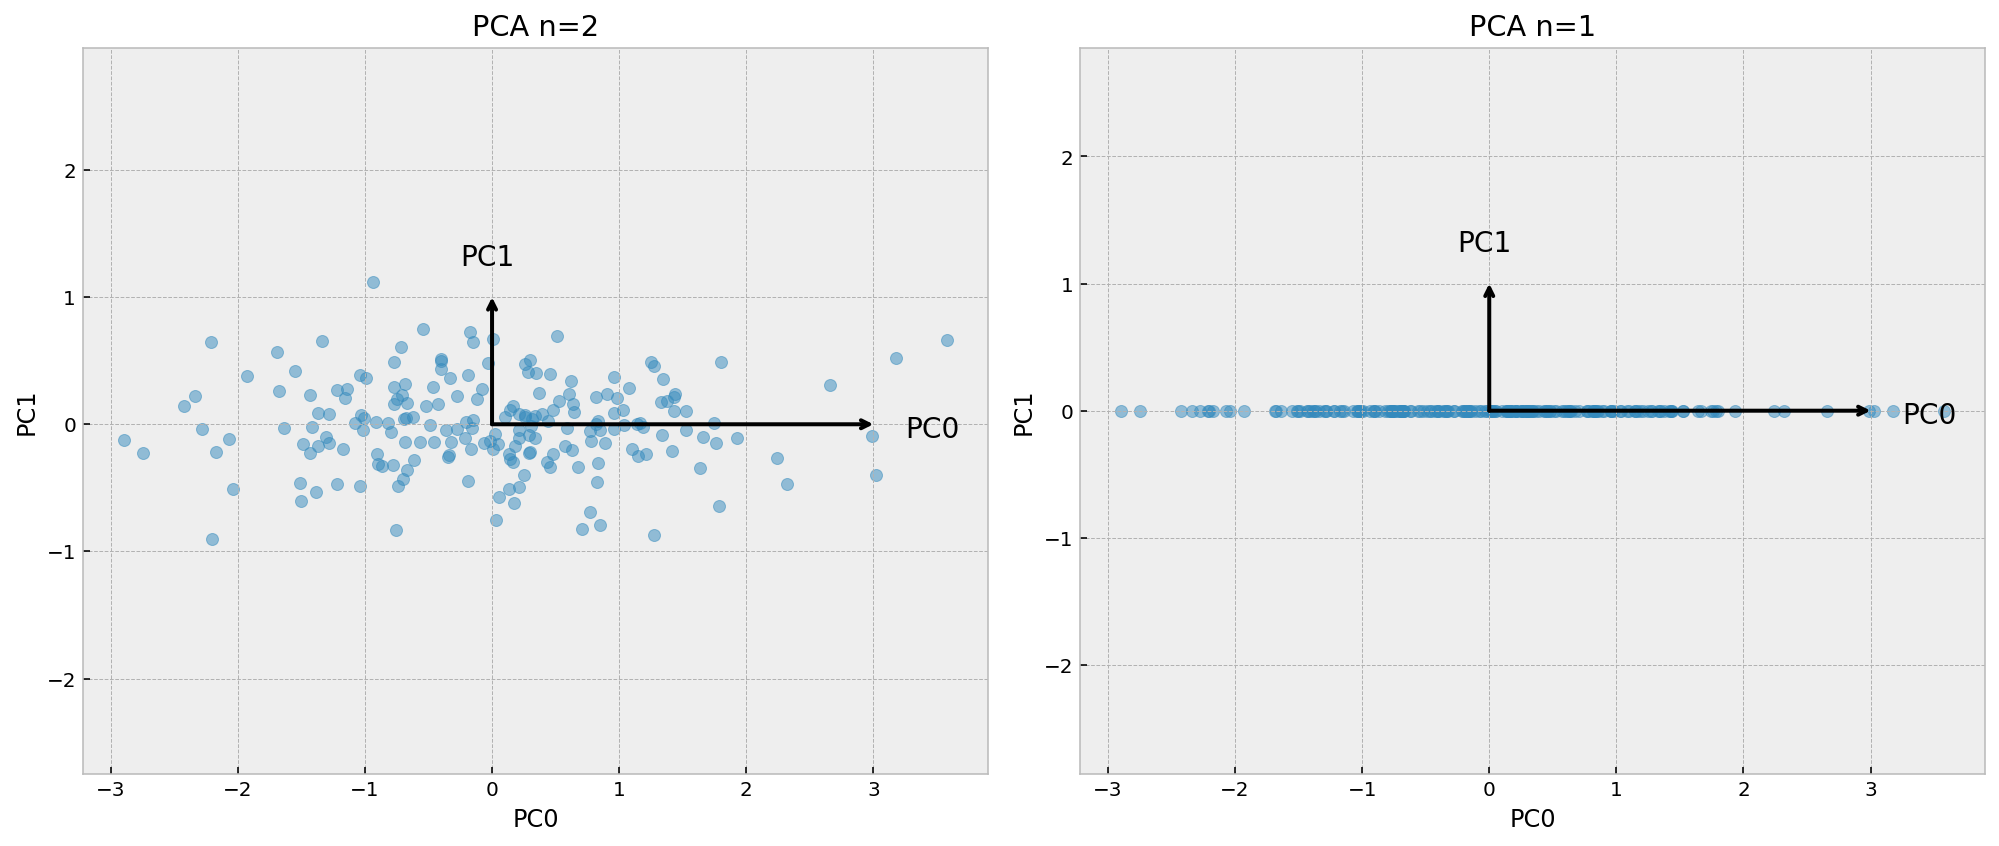

In [25]:
# projecting onto PC0
plt.figure(figsize=[14,6])
ax = plt.subplot(121)
plt.scatter(X_pca2[:,0], X_pca2[:,1], alpha=0.5)
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.axis('equal')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA n=2')
plt.text(3.25, -0.1, 'PC0', fontsize=14)
plt.text(-0.25, 1.25, 'PC1', fontsize=14)
plt.subplot(122)
plt.scatter(X_pca1[:], np.zeros(X_pca1.shape), alpha=0.5)
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.axis('equal')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA n=1')
plt.text(3.25, -0.1, 'PC0', fontsize=14)
plt.text(-0.25, 1.25, 'PC1', fontsize=14)
plt.tight_layout();

Rotate back from the principal component axes perspective to the original data axes perspective.

In [26]:
# go back from PCA coordinates to our data's original coordinates
X_pca1_projected_in_original_coords = pca1.inverse_transform(X_pca1)

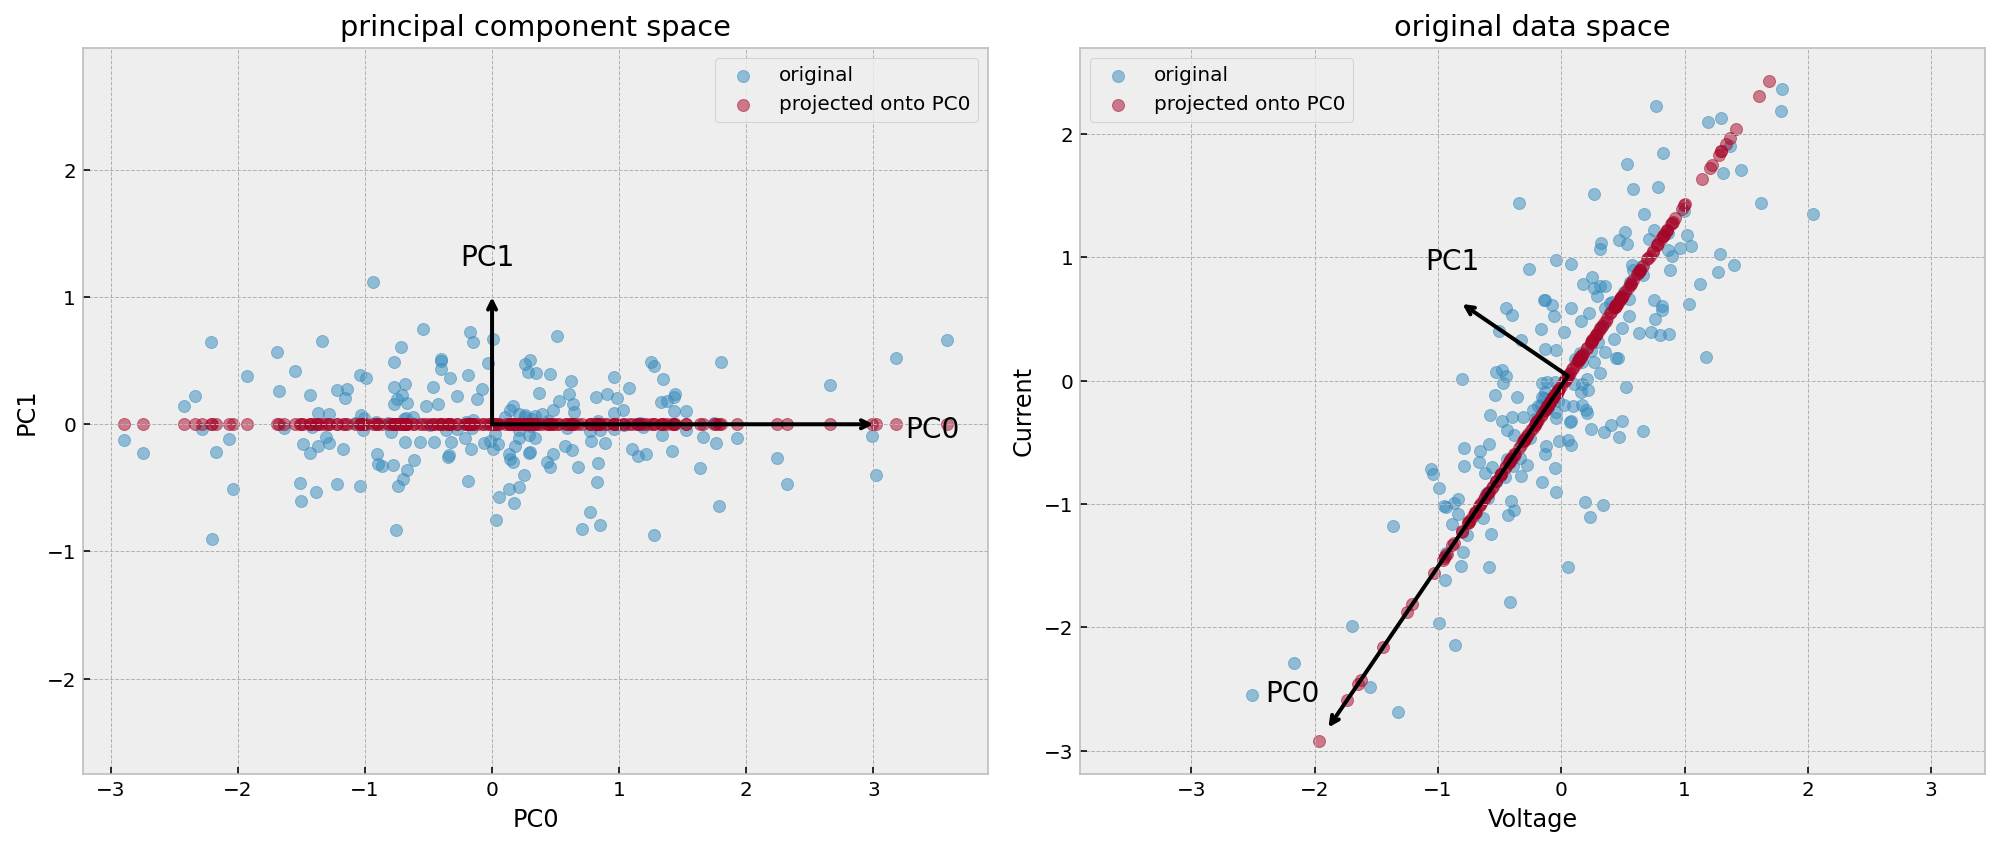

In [27]:
# original data overlaid with PCA compressed data
plt.figure(figsize=[14,6])
ax = plt.subplot(121)
plt.scatter(X_pca2[:,0], X_pca2[:,1], alpha=0.5, label='original')
plt.scatter(X_pca1[:], np.zeros(X_pca1.shape), alpha=0.5, label='projected onto PC0')
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.axis('equal')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('principal component space')
plt.text(3.25, -0.1, 'PC0', fontsize=14)
plt.text(-0.25, 1.25, 'PC1', fontsize=14)
plt.legend(loc='best')

plt.subplot(122)
plt.scatter(X[:,0], X[:,1], alpha=0.5, label='original')
plt.scatter(X_pca1_projected_in_original_coords[:,0], X_pca1_projected_in_original_coords[:,1], 
            alpha=0.5, label='projected onto PC0')
for length, pcaxis in zip(pca2.explained_variance_, pca2.components_):
    v = pcaxis * 3 * np.sqrt(length)
    draw_vector(pca2.mean_, pca2.mean_ + v)
plt.axis('equal')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('original data space')
plt.text(-2.4, -2.6, 'PC0', fontsize=14)
plt.text(-1.1, 0.9, 'PC1', fontsize=14)
plt.legend(loc='best')
plt.tight_layout();

    PC0 = -0.56 Voltage - 0.83 Current
    PC1 = -0.83 Voltage - 0.56 Current

What are PC0 and PC1?

    PC0 = -0.56 Voltage - 0.83 Current
    PC1 = -0.83 Voltage - 0.56 Current

* They're rotated orthogonal axes in the original Current vs. Voltage space.
* PC0 and PC1 are each different mixtures of Current and Voltage.
* Each principal component is therefore a different mixture of your original data axes.

!!! PCA cares about variance in the data.

* If the units of the different dimensions are different and their scales are widely different, then PCA will tend to maximize the contribution of the dimension with the largest units.
* To keep this from happening, you should in such cases first standardize the data in each dimension, then perform PCA on the standardized data. This way, the variance in each dimension will be treated equally.

How many principal components should you choose?

* Often 2 or 3 are chosen simply to make it easier to visualize the data.
* Otherwise, you can look to see at what point adding more PCs does not do much better at explaining the variation in the data.

### Learning Objectives

1. You will be able to quantify the amount of variance explained by any given number of principal components.

In [28]:
# PCA with maximum number of components you want to consider
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([0.91734214, 0.08265786])

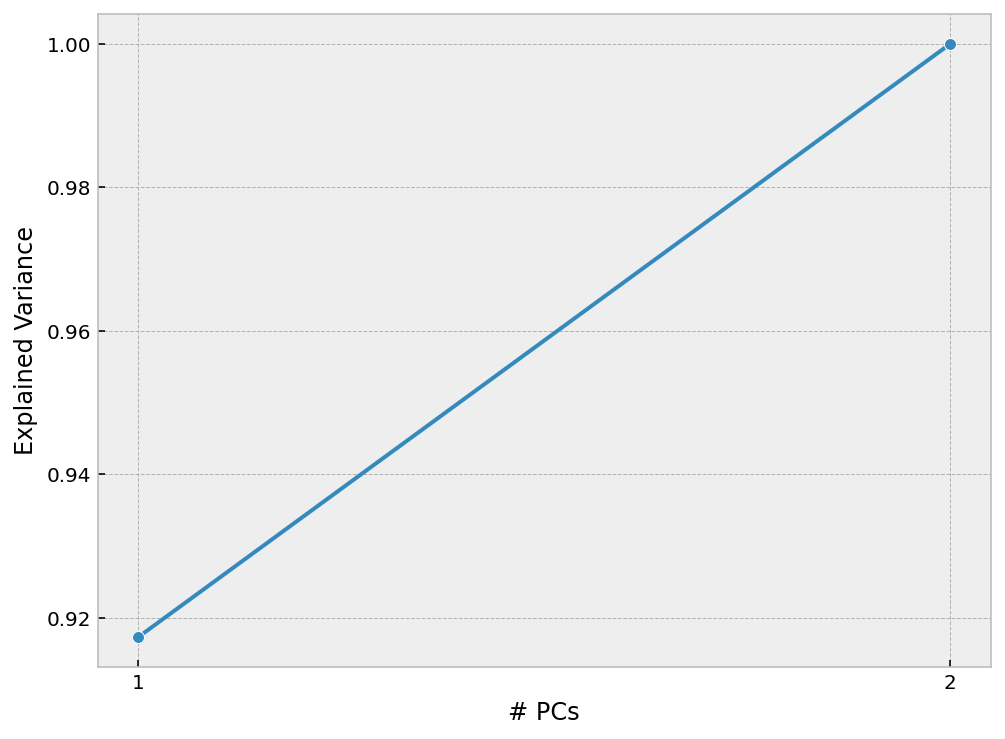

In [29]:
numPC = np.arange(1, 3)
plt.plot(numPC, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xticks(numPC)
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

### A higher dimensional example.

### Learning Objectives

1. You will see how the concepts above relate to a higher dimensional data set.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [30]:
import pandas as pd
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df = df.dropna()
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
75,3415_1,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,Memantine,C/S,c-CS-m
76,3415_2,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,Memantine,C/S,c-CS-m
77,3415_3,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,Memantine,C/S,c-CS-m
78,3415_4,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,Memantine,C/S,c-CS-m
79,3415_5,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,3525_11,0.382149,0.595792,0.399101,2.527574,4.629493,0.317810,0.213235,6.219567,0.232639,...,0.122308,0.507017,0.172393,0.200097,0.221994,1.141423,Ts65Dn,Saline,S/C,t-SC-s
1046,3525_12,0.387947,0.586510,0.431650,2.527041,4.781082,0.316903,0.222111,6.307723,0.239074,...,0.121216,0.492432,0.177319,0.207593,0.235223,1.104757,Ts65Dn,Saline,S/C,t-SC-s
1047,3525_13,0.343695,0.562547,0.361243,2.412885,3.949361,0.330158,0.225620,6.060165,0.254951,...,0.121936,0.490258,0.169076,0.182590,0.243715,1.104494,Ts65Dn,Saline,S/C,t-SC-s
1048,3525_14,0.346594,0.551467,0.390353,2.445052,4.236201,0.343610,0.229239,6.023371,0.240676,...,0.136900,0.502282,0.180016,0.199685,0.269866,1.136585,Ts65Dn,Saline,S/C,t-SC-s


Each of 552 mice/samples is a data point in a 77-dimensional space (one dimension for each protein whose expression level was measured).

* Each mouse data point is 77 dimensional (one dimension for each protein with the value in that dimension being that proteins expression level).
* If it were possible to visualize 77 dimensions, you could plot each mouse as a point on a graph with 77 axes (one for each protein).

In [31]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels for all mice
X.shape

(552, 77)

# Exercise

Perform PCA on the cortical protein expression level dataset using 20 components, and plot the cummulative variance explained by each component.

How many principal componenets do you need to explain ~90% of the variance in the data?

In [ ]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']

...

plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

Let's use PCA to compress the mouse coritcal protein expression data by using only 6 values (6 dimensions) to explain each mouse's expression profile. This will explain ~90% of the variance in the data.

In [32]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']

pca = PCA(n_components=6)
pca.fit(X)
X_pca = pca.transform(X)

print('    X: ', X.shape)
print('X_pca: ', X_pca.shape)

    X:  (552, 77)
X_pca:  (552, 6)


Did you throw away all information about 71 of the 77 proteins?

!!! NO. You did NOT completely throw away 71 of the original features!!!

* You rotated your perspective and then compressed the data along 6 of the axes from our rotated point of view.
* After compressing if you rotate back to the original feature space (point of view), then each mouse will be a point in our original 77-dimensional space.
* However, the data points will NOT be exactly what they were before compression. Some of the variance in the data will have been lost by projecting the data onto only 6 PCs.
* But each data point will still carry information about all 77 of the original dimensions (features/proteins) as each of the 6 principal components you used to describe the data is itself a weighted mixture of all 77 original feature dimensions.

In [33]:
X_projected = pca.inverse_transform(X_pca)

print('          X: ', X.shape)
print('      X_pca: ', X_pca.shape)
print('X_projected: ', X_projected.shape)

          X:  (552, 77)
      X_pca:  (552, 6)
X_projected:  (552, 77)


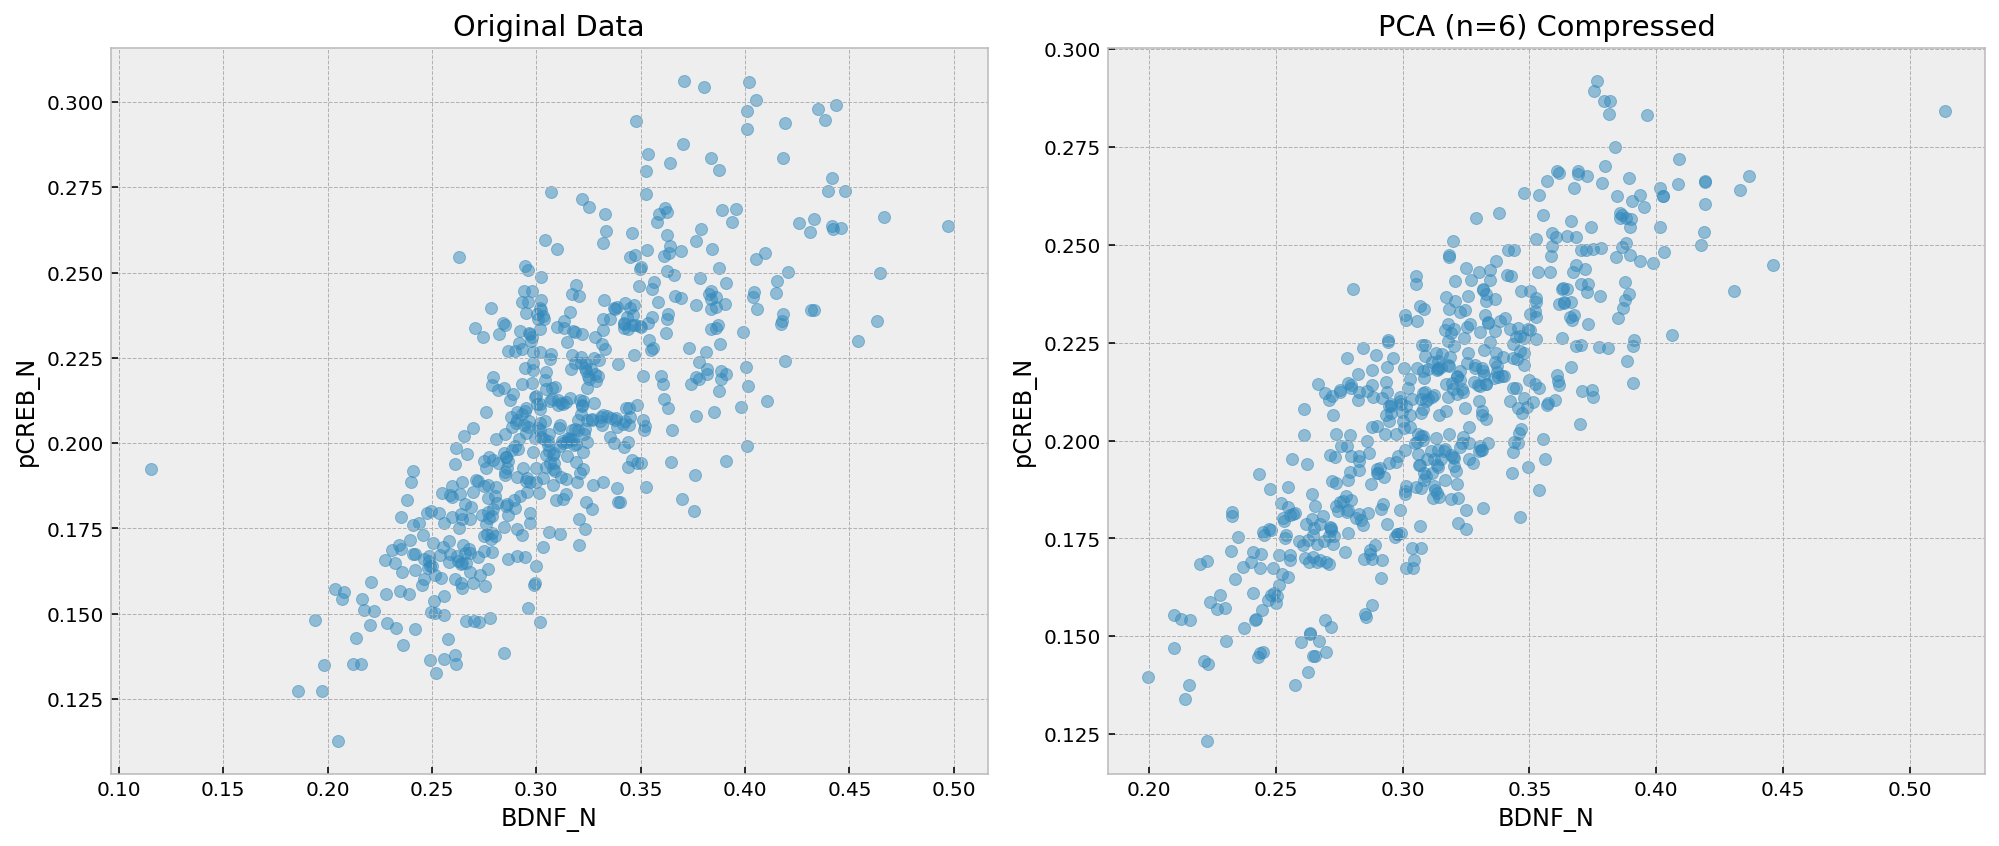

In [34]:
i = 2
j = 8
plt.figure(figsize=[14,6])
plt.subplot(121)
plt.scatter(X.iloc[:,i], X.iloc[:,j], alpha=0.5)
plt.xlabel(X.columns[i])
plt.ylabel(X.columns[j])
plt.title('Original Data');
plt.subplot(122)
plt.scatter(X_projected[:,i], X_projected[:,j], alpha=0.5)
plt.xlabel(X.columns[i])
plt.ylabel(X.columns[j])
plt.title('PCA (n=6) Compressed');
plt.tight_layout();

So what are the PCs?

* They are the rotated coordinate axes (well, 6 of the 77 as we ignored all variance along 71 of them).
* The rotated axes are each mixtures of the original 77 features axes.
* So each PC is a mixture of the original 77 features. Thus, we haven't completely forgotten all about 71 of the features.

In [35]:
pca.components_.shape

(6, 77)

In [36]:
pc0 = pca.components_[0,:]
pc0.shape

(77,)

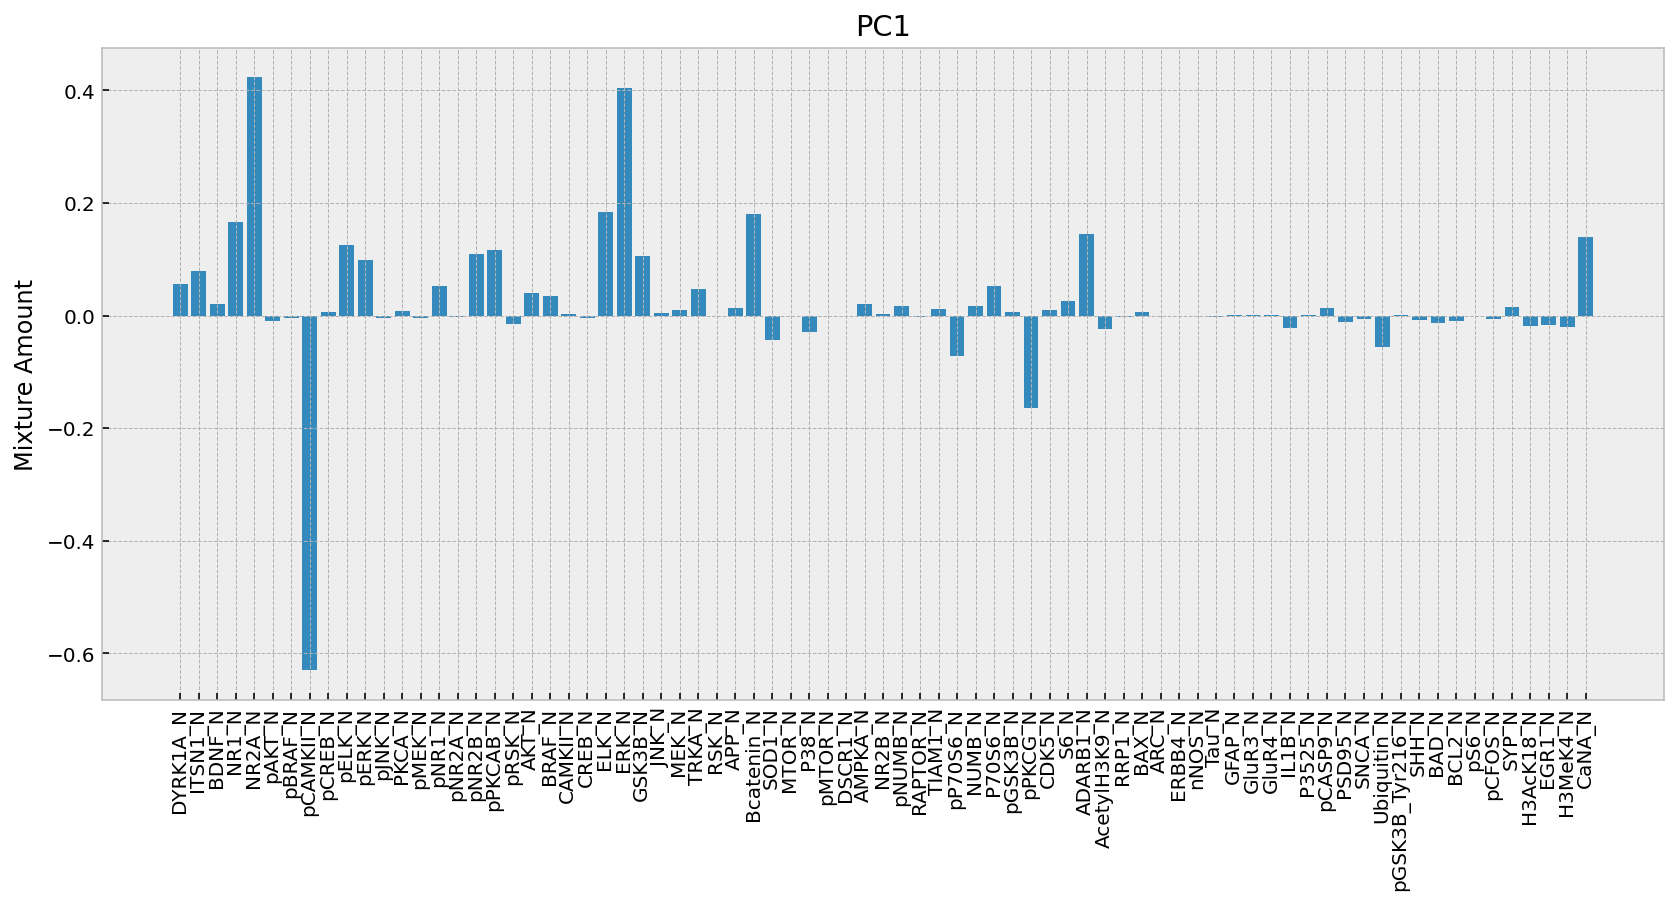

In [37]:
i = 1
plt.figure(figsize=(14, 6))
plt.bar(range(77), pca.components_[i,:])
plt.xticks(range(77), X.columns, rotation='vertical')
plt.ylabel('Mixture Amount')
plt.title(f'PC{i}');

You have thrown away some information, but NOT by getting rid of specific features. Instead you have thrown out small variations spread across all of the features.

This can massively reduce the size of high dimensional datasets and greatly simplify their analysis.

This can also help account for correlations in the data feature space by reducing multiple correlated features to a single principal component.

You can optionally specify how much of the total variance you want to explain rather than the number of principal components.

The following will retain the minimum number of principal components to account for at least 95% of the variance in the dataset.

In [38]:
X = df.loc[:,'DYRK1A_N':'CaNA_N']

pca = PCA(0.95)
pca.fit(X)

pca.n_components_

9

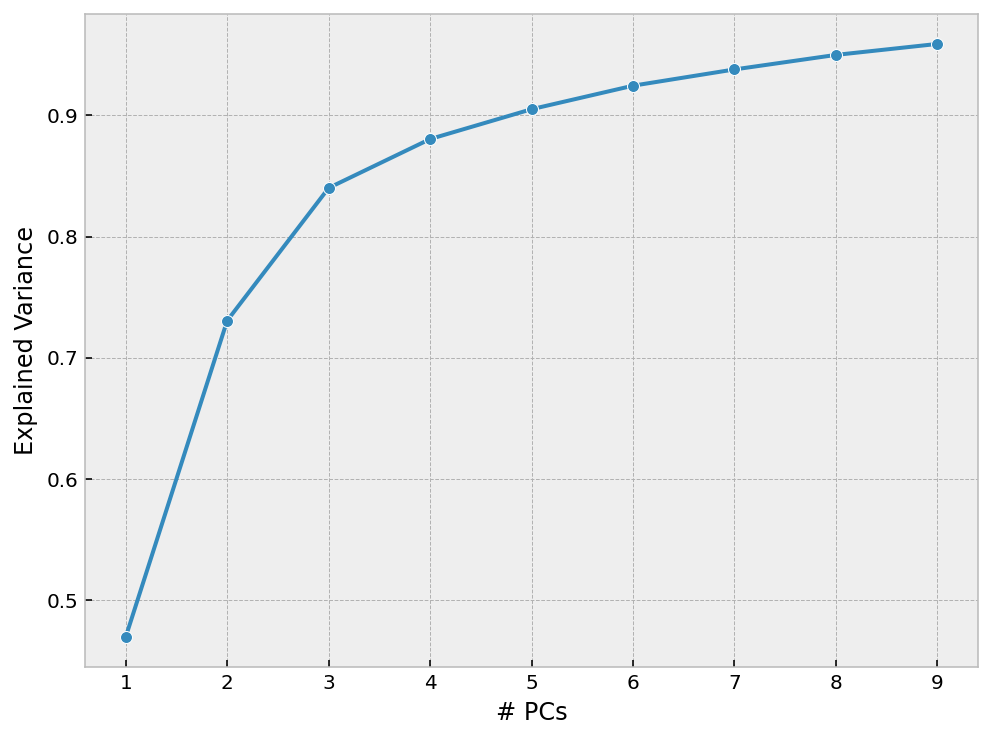

In [39]:
numPC = np.arange(1, 10)
plt.plot(numPC, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xticks(numPC)
plt.xlabel('# PCs')
plt.ylabel('Explained Variance');

# Quiz

What is the dimensionality (length) of each of the 9 principal component vectors and what does it represent?

# Quiz

What fraction of the original 77 protiens have we thrown out ALL INFORMATION for upon compressing the data with ONLY 9 principal components?